In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Крок 1
Генерація даних та їх центрування, примітивний вивід

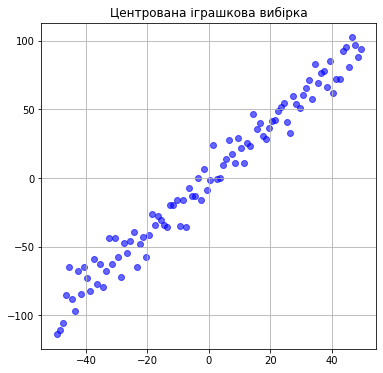

array([50.5       , 99.99411432])

In [134]:
x = np.arange(1,101)
y = x*2 + np.random.randn(100)*10

M = np.vstack((x,y))
M_centered = np.array([M[0] - np.mean(M[0]), M[1] - np.mean(M[1])])

m = np.array([np.mean(M[0]), np.mean(M[1])])

plt.figure(figsize=(6,6))
plt.title('Центрована іграшкова вибірка')
plt.scatter(M_centered[0], M_centered[1], c='b', alpha=0.6)
plt.grid()
plt.show()

### Крок 2
Будується матриця коваріації Σ, діагональними елементами якої є дисперсії ознак:

Таким образом, в нашей матрице по диагонали будут дисперсии признаков (т.к. i = j), а в остальных ячейках – ковариации соответствующих пар признаков. А в силу симметричности ковариации матрица тоже будет симметрична.

In [135]:
covmat = np.cov(M_centered)

print(f'Дисперсія Х: {covmat[0,0]}')
print(f'Дисперсія Y: {covmat[1,1]}')

Дисперсія Х: 841.6666666666667
Дисперсія Y: 3318.4814201571035


### Крок 3
Знаходження власних значень та власних векторів матриці коваріації

Теперь надо найти такой вектор (в нашем случае только один), при котором максимизировался бы размер (дисперсия) проекции нашей выборки на него.

Таким образом, направление максимальной дисперсии у проекции всегда совпадает с айгенвектором, имеющим максимальное собственное значение, равное величине этой дисперсии.

In [142]:
_, vect = np.linalg.eig(covmat)
print('Власні власні значення та власні в-ри матриці коваріацій:\n', _, '\n\n', vect)


Власні власні значення та власні в-ри матриці коваріацій:
 [  18.82357776 4141.32450907] 

 [[-0.89465187 -0.44676396]
 [ 0.44676396 -0.89465187]]


### Крок 4
Зменшення розмірності матриці ознак задаванням проекції на одну із осей (або гіперплощину)

In [161]:
v = -vect[:1]
M_c_new = np.dot(M_centered[1, 1], v) + m
M_c_new

array([[-48.20520471,  50.70351345]])

### Використання sklearn

In [192]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

M_pca = pca.fit_transform(M.T)

print('Вектор середніх величин по осям:', pca.mean_)
print('Проекція:\n', pca.components_)
print('Збереження дисперсії:', pca.explained_variance_ratio_)


Вектор середніх величин по осям: [50.5        99.99411432]
Проекція:
 [[-0.44676396 -0.89465187]
 [-0.89465187  0.44676396]]
Збереження дисперсії: [0.99547526 0.00452474]


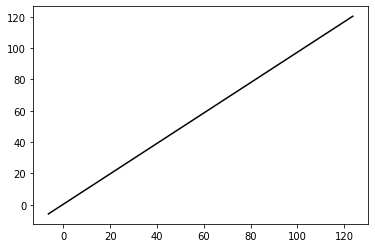

In [193]:
plt.plot(M_pca[0], M_pca[1], c='k')
plt.show()

Библиотечный метод автоматически проецирует на оси, максимизирующие дисперсию. Это не всегда рационально. К примеру, на данном рисунке неаккуратное снижение размерности приведет к тому, что классификация станет невозможна. Тем не менее, проекция на меньший вектор успешно снизит размерность и сохранит классификатор.
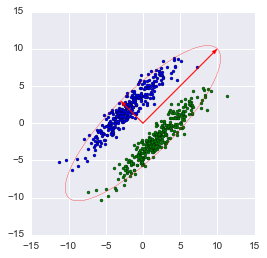

PCA (как и другие классические методы редукции многомерных данных) ищет только линейные зависимости, в отличие от тех же нейронных сетей, которые могут находить и нелинейные зависимости. PCA основан на сингулярном разложении матрицы (SVD).